# Pivoted full data

En este documento se crean las tablas para las predicciones.

In [1]:
import polars as pl
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scripts import style
style.mpl_apply()

PATH = "data/cephalosporines_clean/"

# Full data

In [2]:
df = pd.read_parquet(PATH + "pivoted_full_data.parquet")
df = df.set_index("REPORT_ID")
df.head()

,AGE_Y,WEIGHT_KG,HEIGHT_CM,GENDER_CODE,furosemide,chlorpromazine,cephalothin,chlordiazepoxide hydrochloride,fursemide,hydralazine hydrochloride,...,"Injury, poisoning and procedural complications",Reproductive system and breast disorders,Surgical and medical procedures,"Pregnancy, puerperium and perinatal conditions","Neoplasms benign, malignant and unspecified (incl cysts and polyps)","Congenital, familial and genetic disorders",Endocrine disorders,Social circumstances,Product issues,
REPORT_ID,,,,,,,,,,,,,,,,,,,,,
164,68.0,47.0,173.0,0,1,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
173,42.0,82.0,180.0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,29.0,NaN,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346,NaN,NaN,NaN,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
356,21.0,60.0,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
soc_cols = [
    "Blood and lymphatic system disorders",
    "Cardiac disorders",
    "Congenital, familial and genetic disorders",
    "Ear and labyrinth disorders",
    "Endocrine disorders",
    "Eye disorders",
    "Gastrointestinal disorders",
    "General disorders and administration site conditions",
    "Hepatobiliary disorders",
    "Immune system disorders",
    "Infections and infestations",
    "Injury, poisoning and procedural complications",
    "Investigations",
    "Metabolism and nutrition disorders",
    "Musculoskeletal and connective tissue disorders",
    "Neoplasms benign, malignant and unspecified (incl cysts and polyps)",
    "Nervous system disorders",
    "Pregnancy, puerperium and perinatal conditions",
    "Product issues",
    "Psychiatric disorders",
    "Renal and urinary disorders",
    "Reproductive system and breast disorders",
    "Respiratory, thoracic and mediastinal disorders",
    "Skin and subcutaneous tissue disorders",
    "Social circumstances",
    "Surgical and medical procedures",
    "Vascular disorders",
]

# drop soc columns
df = df.drop(columns=soc_cols)

In [4]:
df_copy = pd.read_parquet(PATH + "pivoted_full_data.parquet")
df_copy = df_copy.set_index("REPORT_ID")

In [5]:
# COUNT THEMBER OF NANS IN AGE_Y	WEIGHT_KG	HEIGHT_CM	GENDER_CODE
df.isna().sum()

AGE_Y                        1333
WEIGHT_KG                   10762
HEIGHT_CM                   13020
GENDER_CODE                     0
furosemide                      0
                            ...  
daratumumab (humax-cd38)        0
sigvotatug vedotin              0
cephalosporin nos               0
ravulizumab                     0
                                0
Length: 9093, dtype: int64

# AGE

In [6]:
males = df[df["GENDER_CODE"] == 0]
females = df[df["GENDER_CODE"] == 1]

In [7]:
males

,AGE_Y,WEIGHT_KG,HEIGHT_CM,GENDER_CODE,furosemide,chlorpromazine,cephalothin,chlordiazepoxide hydrochloride,fursemide,hydralazine hydrochloride,...,prunus cerasus extract,prunus cerasus root,prunus cerasus bark,cilgavimab,tixagevimab,daratumumab (humax-cd38),sigvotatug vedotin,cephalosporin nos,ravulizumab,
REPORT_ID,,,,,,,,,,,,,,,,,,,,,
164,68.0,47.0,173.0,0,1,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
173,42.0,82.0,180.0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
449,72.0,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
457,48.0,83.0,178.0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
464,75.0,NaN,NaN,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908132205,65.0,NaN,NaN,0,11,0,0,0,11,0,...,0,0,0,0,0,0,0,0,0,0
908134609,80.0,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
908140706,19.0,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


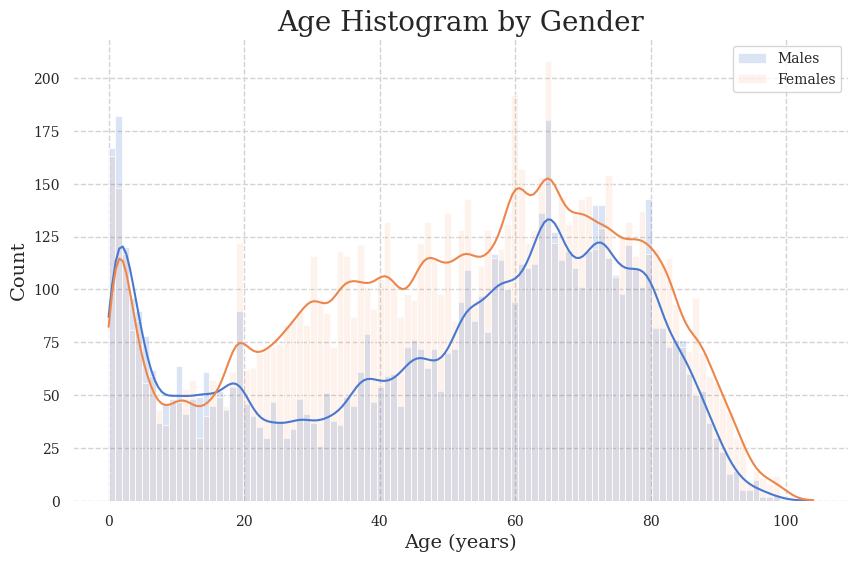

In [8]:
# now histogram of coutns
plt.figure(figsize=(10, 6))
sns.histplot(males["AGE_Y"].dropna(), label="Males", alpha=0.2, bins=105, kde=True, kde_kws={"bw_adjust":0.4, "cut":0})
sns.histplot(females["AGE_Y"].dropna(), label="Females", alpha=0.1, bins=105, kde=True, kde_kws={"bw_adjust":0.4, "cut":0})
plt.xlabel("Age (years)")   
plt.ylabel("Count")
plt.title("Age Histogram by Gender")
plt.legend()
plt.show()

#### Fill the NaNs in AGE_Y considering all the variables

In [9]:
# do a simple random forest for regression to impute missing ages 
from sklearn.ensemble import RandomForestRegressor

In [10]:
# separate target and features
males_y = males["AGE_Y"] 
males_x = males.drop(columns=["AGE_Y"])

# the non nans are the training data
males_train_y = males_y[males_y.notna()] # it is the same as males_before
males_train_x = males_x[males_y.notna()]

# train to get the nans
rf_males = RandomForestRegressor(n_estimators=10, random_state=42)
rf_males.fit(males_train_x, males_train_y)  

# predict the nans
males_pred = rf_males.predict(males_x[males_y.isna()])
males.loc[males_y.isna(), "AGE_Y"] = males_pred

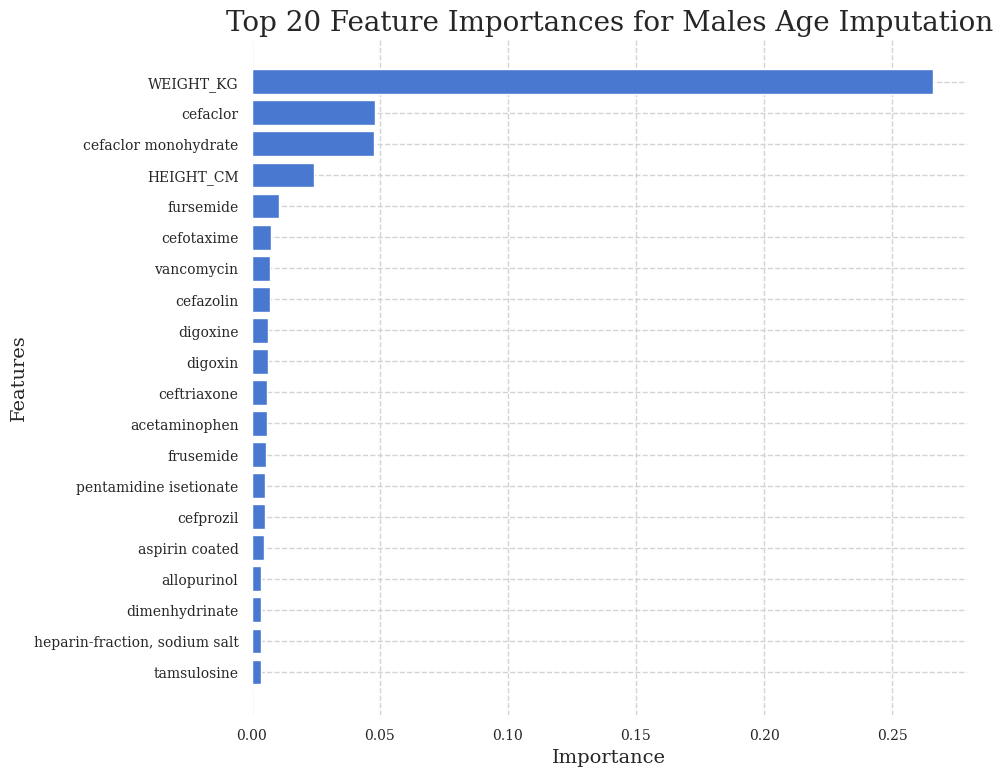

In [11]:
# plot the top 20 most important features as a bar chart
importances = rf_males.feature_importances_
indices = np.argsort(importances)[::-1][:20]  # top 20
features = males_x.columns[indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 8))
plt.barh(features[::-1], top_importances[::-1])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances for Males Age Imputation')
plt.tight_layout()
plt.show()

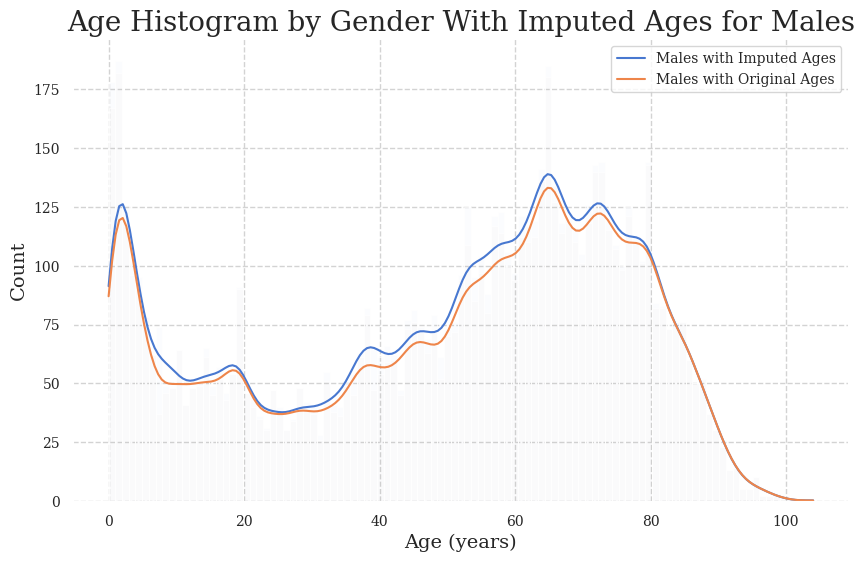

In [12]:
# now histogram of coutns
plt.figure(figsize=(10, 6))
sns.histplot(males["AGE_Y"].dropna(), alpha=0.02, bins=105, kde=True, kde_kws={"bw_adjust":0.4, "cut":0})
sns.histplot(males_train_y.dropna(), alpha=0.01, bins=105, kde=True, kde_kws={"bw_adjust":0.4, "cut":0})
plt.xlabel("Age (years)")   
plt.ylabel("Count")
plt.title("Age Histogram by Gender With Imputed Ages for Males")
plt.legend(labels=["Males with Imputed Ages", "Males with Original Ages"])
plt.show()

In [13]:
# separate target and features
females_y = females["AGE_Y"]
females_x = females.drop(columns=["AGE_Y"])

# the non nans are the training data
females_train_y = females_y[females_y.notna()] # it is the same as females_before
females_train_x = females_x[females_y.notna()]

# train to get the nans
rf_females = RandomForestRegressor(n_estimators=10, random_state=42)
rf_females.fit(females_train_x, females_train_y)  

# predict the nans
females_pred = rf_females.predict(females_x[females_y.isna()])
females.loc[females_y.isna(), "AGE_Y"] = females_pred

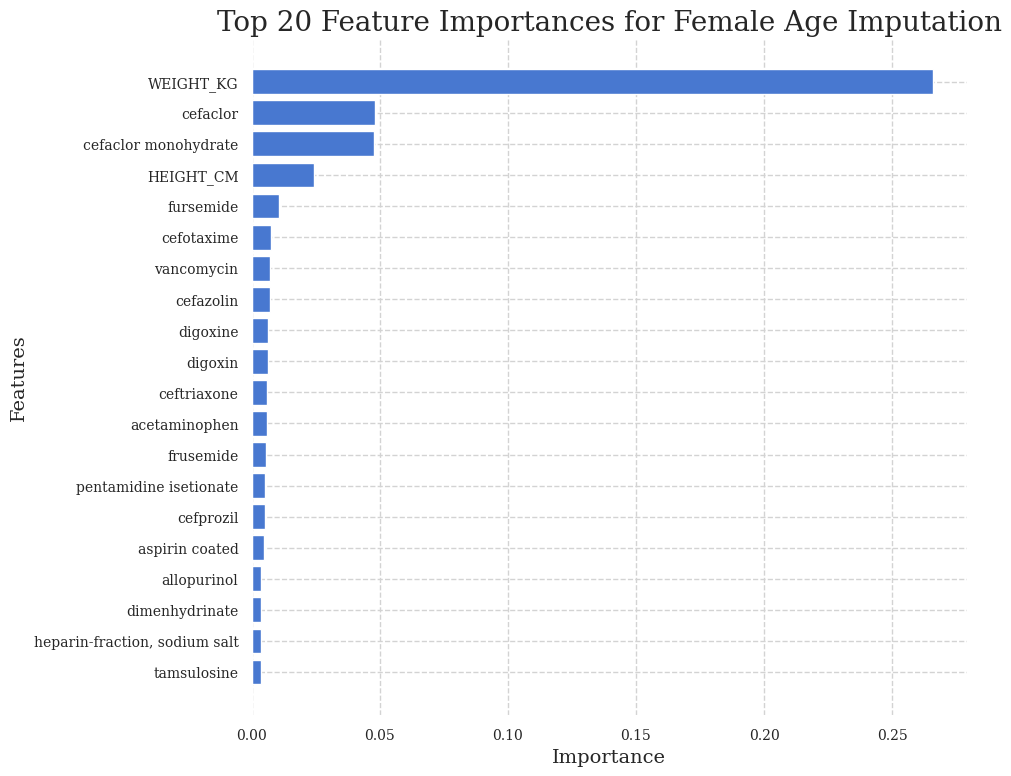

In [14]:
# plot the top 20 most important features as a bar chart
importances = rf_males.feature_importances_
indices = np.argsort(importances)[::-1][:20]  # top 20
features = males_x.columns[indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 8))
plt.barh(features[::-1], top_importances[::-1])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances for Female Age Imputation')
plt.tight_layout()
plt.show()

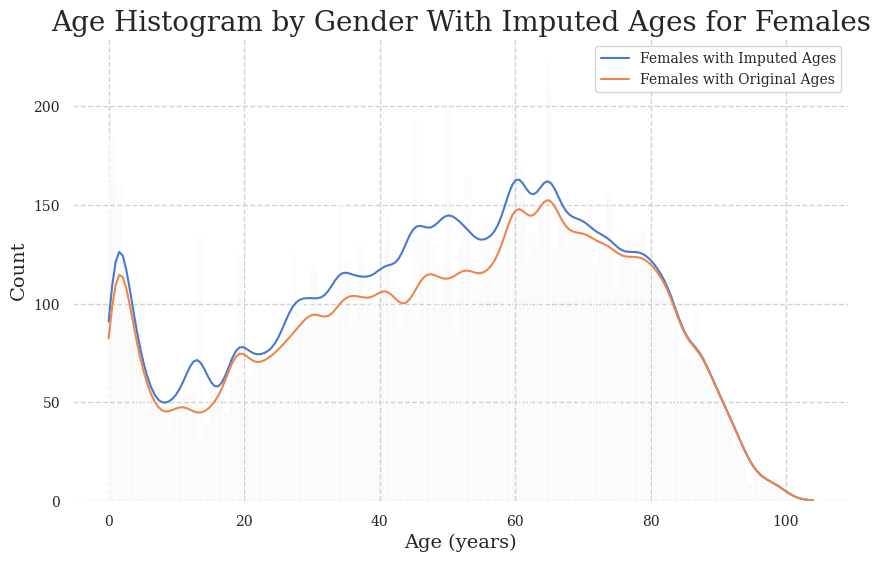

In [15]:
# now histogram of coutns
plt.figure(figsize=(10, 6))
sns.histplot(females["AGE_Y"].dropna(), alpha=0.02, bins=105, kde=True, kde_kws={"bw_adjust":0.4, "cut":0})
sns.histplot(females_train_y.dropna(), alpha=0.01, bins=105, kde=True, kde_kws={"bw_adjust":0.4, "cut":0})
plt.xlabel("Age (years)")   
plt.ylabel("Count")
plt.title("Age Histogram by Gender With Imputed Ages for Females")
plt.legend(labels=["Females with Imputed Ages", "Females with Original Ages"])
plt.show()

In [16]:
# fill the original dataframe
df.loc[males.index, "AGE_Y"] = males["AGE_Y"]
df.loc[females.index, "AGE_Y"] = females["AGE_Y"]

In [17]:
df.isna().sum()

AGE_Y                           0
WEIGHT_KG                   10762
HEIGHT_CM                   13020
GENDER_CODE                     0
furosemide                      0
                            ...  
daratumumab (humax-cd38)        0
sigvotatug vedotin              0
cephalosporin nos               0
ravulizumab                     0
                                0
Length: 9093, dtype: int64

# WEIGHT_KG

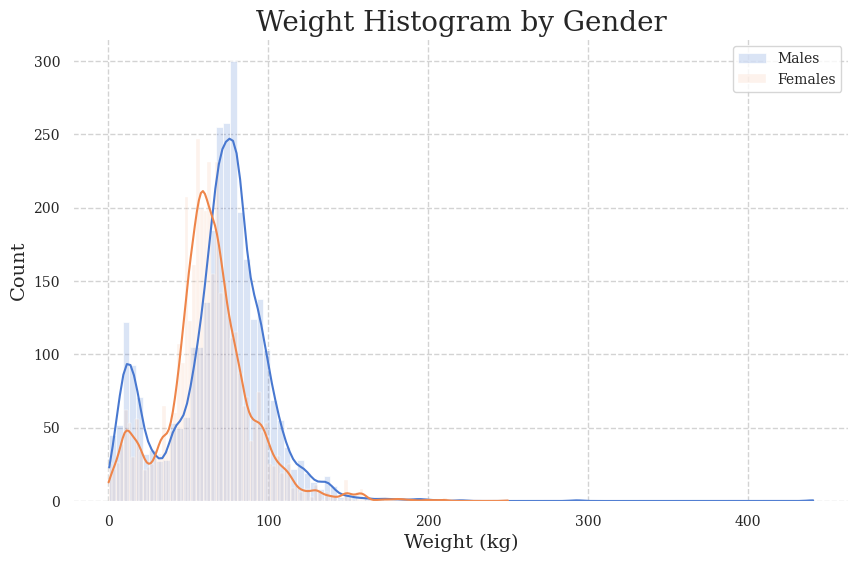

In [18]:
# now histogram of coutns
plt.figure(figsize=(10, 6))
sns.histplot(males["WEIGHT_KG"].dropna(), label="Males", alpha=0.2, bins=105, kde=True, kde_kws={"bw_adjust":0.6, "cut":0})
sns.histplot(females["WEIGHT_KG"].dropna(), label="Females", alpha=0.1, bins=105, kde=True, kde_kws={"bw_adjust":0.6, "cut":0})
plt.xlabel("Weight (kg)")   
plt.ylabel("Count")
plt.title("Weight Histogram by Gender")
plt.legend()
plt.show()

In [19]:
# separate target and features
males_y = males["WEIGHT_KG"] 
males_x = males.drop(columns=["WEIGHT_KG"])

# the non nans are the training data
males_train_y = males_y[males_y.notna()] # it is the same as males_before
males_train_x = males_x[males_y.notna()]

# train to get the nans
rf_males = RandomForestRegressor(n_estimators=10, random_state=42)
rf_males.fit(males_train_x, males_train_y)  

# predict the nans
males_pred = rf_males.predict(males_x[males_y.isna()])
males.loc[males_y.isna(), "WEIGHT_KG"] = males_pred

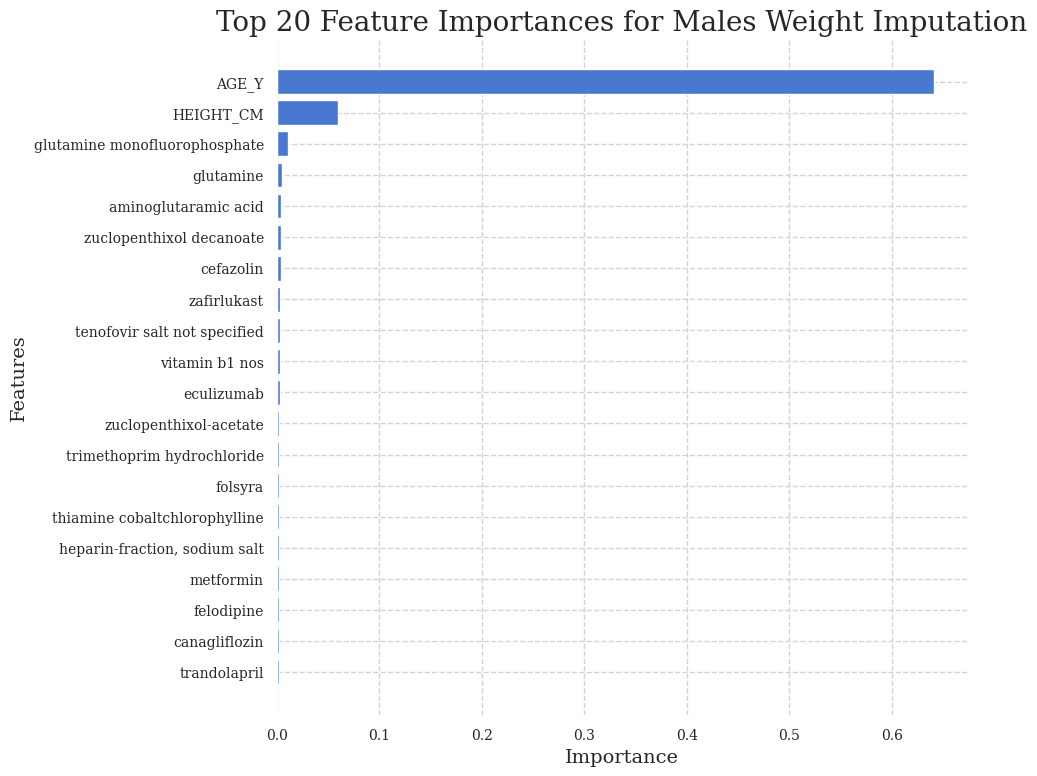

In [20]:
# plot the top 20 most important features as a bar chart
importances = rf_males.feature_importances_
indices = np.argsort(importances)[::-1][:20]  # top 20
features = males_x.columns[indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 8))
plt.barh(features[::-1], top_importances[::-1])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances for Males Weight Imputation')
plt.tight_layout()
plt.show()

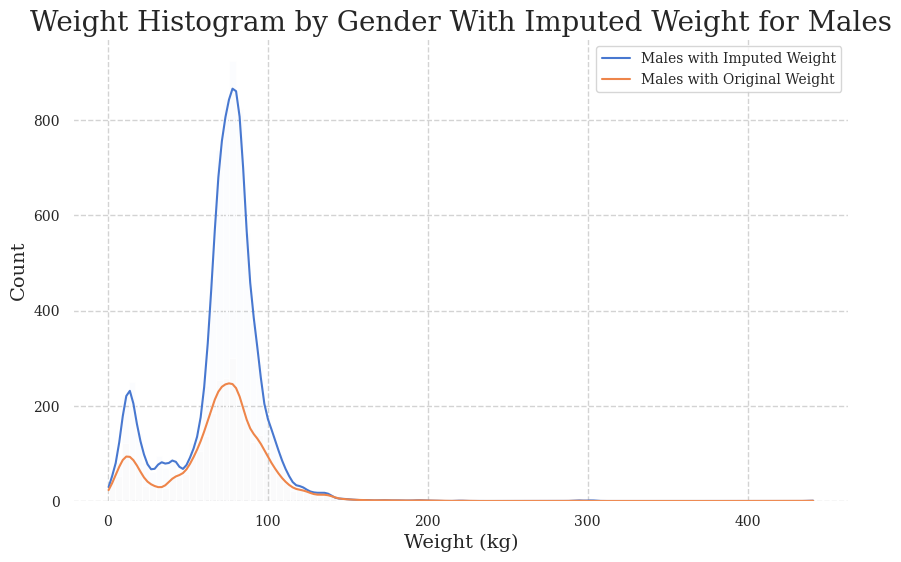

In [21]:
# now histogram of coutns
plt.figure(figsize=(10, 6))
sns.histplot(males["WEIGHT_KG"].dropna(), alpha=0.02, bins=105, kde=True, kde_kws={"bw_adjust":0.6, "cut":0})
sns.histplot(males_train_y.dropna(), alpha=0.01, bins=105, kde=True, kde_kws={"bw_adjust":0.6, "cut":0})
plt.xlabel("Weight (kg)")   
plt.ylabel("Count")
plt.title("Weight Histogram by Gender With Imputed Weight for Males")
plt.legend(labels=["Males with Imputed Weight", "Males with Original Weight"])
plt.show()

In [22]:
# separate target and features
females_y = females["WEIGHT_KG"]
females_x = females.drop(columns=["WEIGHT_KG"])

# the non nans are the training data
females_train_y = females_y[females_y.notna()] # it is the same as females_before
females_train_x = females_x[females_y.notna()]

# train to get the nans
rf_females = RandomForestRegressor(n_estimators=10, random_state=42)
rf_females.fit(females_train_x, females_train_y)  

# predict the nans
females_pred = rf_females.predict(females_x[females_y.isna()])
females.loc[females_y.isna(), "WEIGHT_KG"] = females_pred

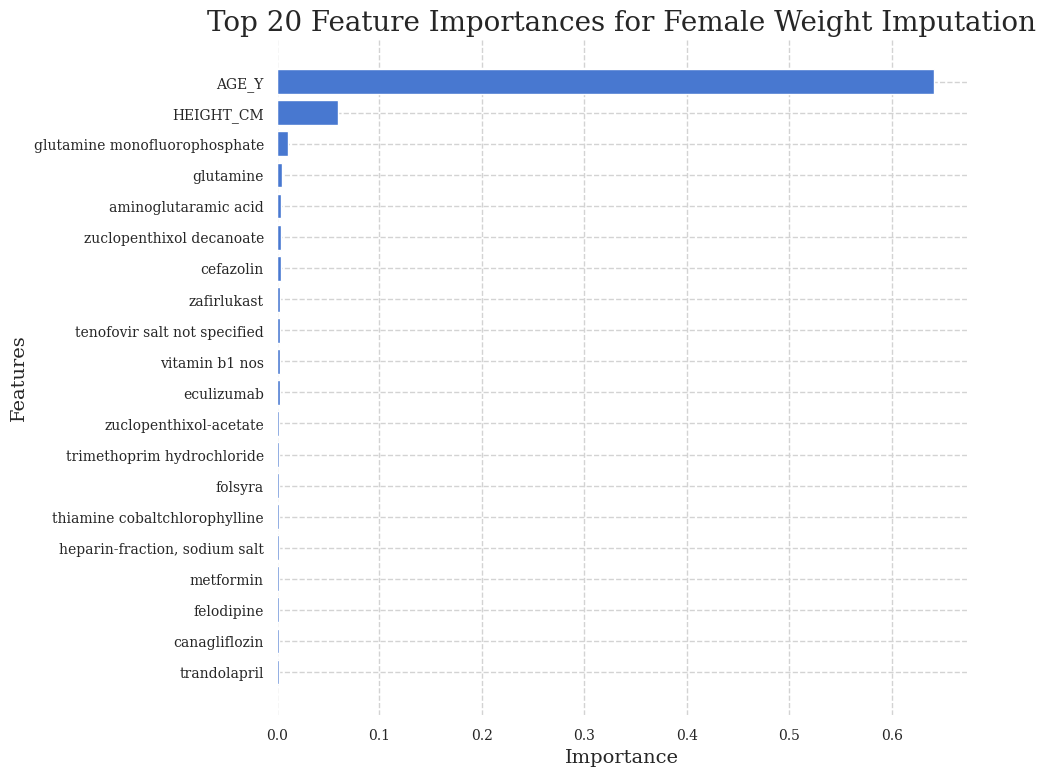

In [23]:
# plot the top 20 most important features as a bar chart
importances = rf_males.feature_importances_
indices = np.argsort(importances)[::-1][:20]  # top 20
features = males_x.columns[indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 8))
plt.barh(features[::-1], top_importances[::-1])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances for Female Weight Imputation')
plt.tight_layout()
plt.show()

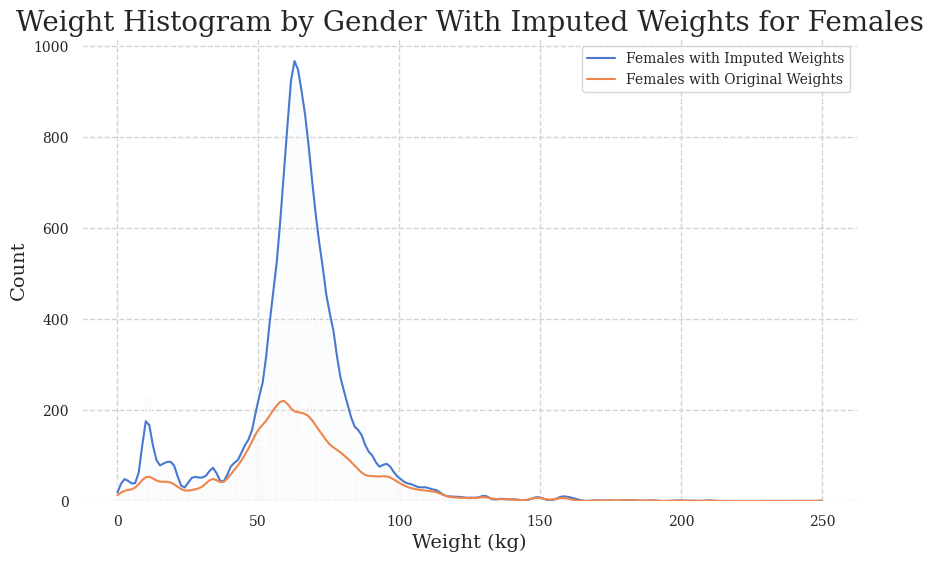

In [24]:
# now histogram of coutns
plt.figure(figsize=(10, 6))
sns.histplot(females["WEIGHT_KG"].dropna(), alpha=0.02, bins=105, kde=True, kde_kws={"bw_adjust":0.4, "cut":0})
sns.histplot(females_train_y.dropna(), alpha=0.01, bins=105, kde=True, kde_kws={"bw_adjust":0.4, "cut":0})
plt.xlabel("Weight (kg)")   
plt.ylabel("Count")
plt.title("Weight Histogram by Gender With Imputed Weights for Females")
plt.legend(labels=["Females with Imputed Weights", "Females with Original Weights"])
plt.show()

# HEIGHTS_CM

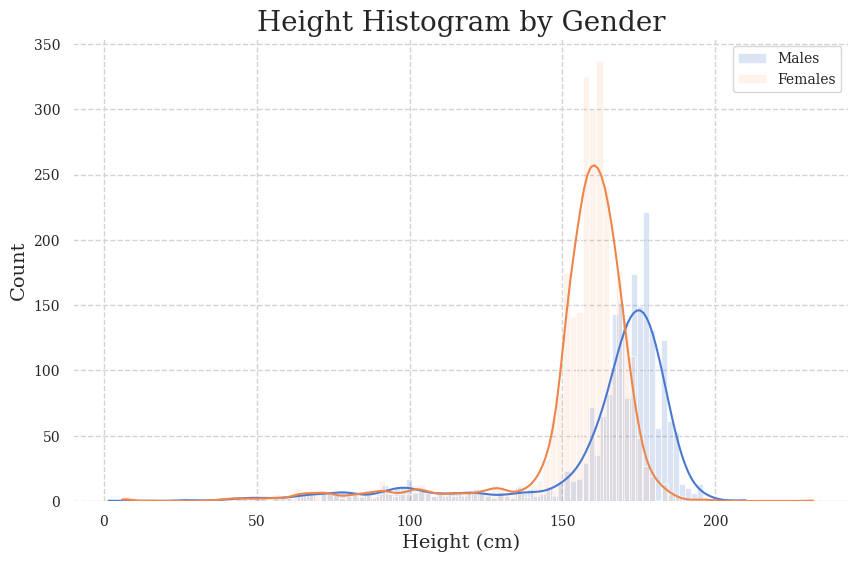

In [25]:
# now histogram of coutns
plt.figure(figsize=(10, 6))
sns.histplot(males["HEIGHT_CM"].dropna(), label="Males", alpha=0.2, bins=105, kde=True, kde_kws={"bw_adjust":0.6, "cut":0})
sns.histplot(females["HEIGHT_CM"].dropna(), label="Females", alpha=0.1, bins=105, kde=True, kde_kws={"bw_adjust":0.6, "cut":0})
plt.xlabel("Height (cm)")   
plt.ylabel("Count")
plt.title("Height Histogram by Gender")
plt.legend()
plt.show()

In [26]:
# separate target and features
males_y = males["HEIGHT_CM"] 
males_x = males.drop(columns=["HEIGHT_CM"])

# the non nans are the training data
males_train_y = males_y[males_y.notna()] # it is the same as males_before
males_train_x = males_x[males_y.notna()]

# train to get the nans
rf_males = RandomForestRegressor(n_estimators=10, random_state=42)
rf_males.fit(males_train_x, males_train_y)  

# predict the nans
males_pred = rf_males.predict(males_x[males_y.isna()])
males.loc[males_y.isna(), "HEIGHT_CM"] = males_pred

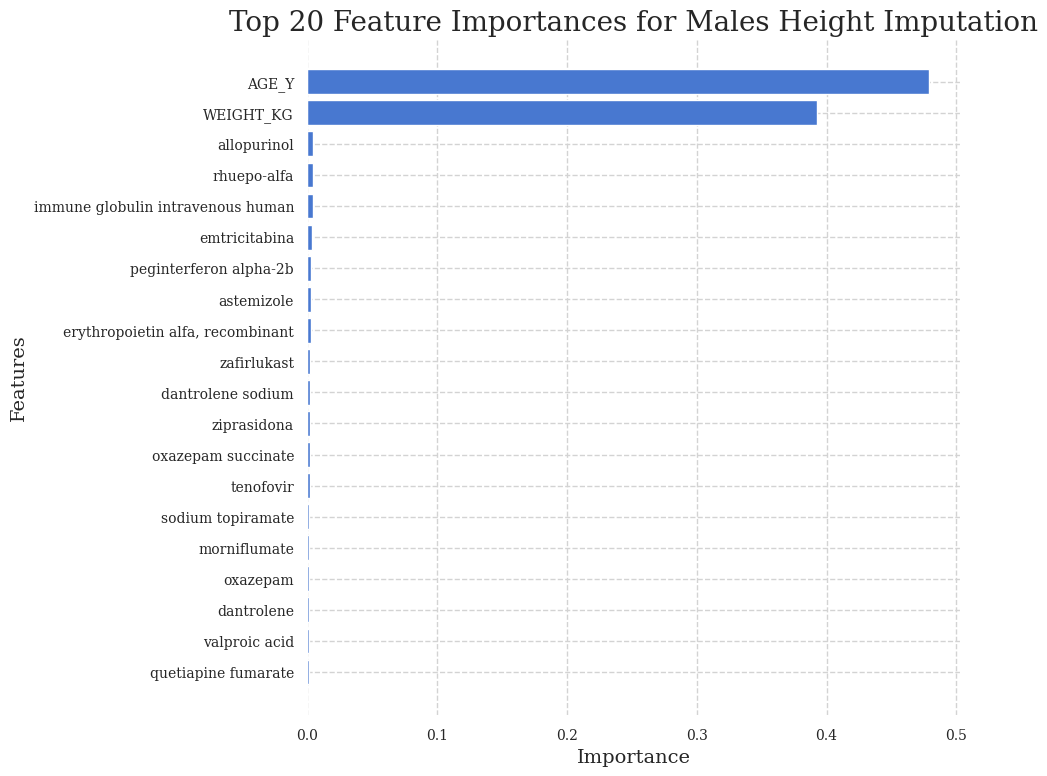

In [27]:
# plot the top 20 most important features as a bar chart
importances = rf_males.feature_importances_
indices = np.argsort(importances)[::-1][:20]  # top 20
features = males_x.columns[indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 8))
plt.barh(features[::-1], top_importances[::-1])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances for Males Height Imputation')
plt.tight_layout()
plt.show()

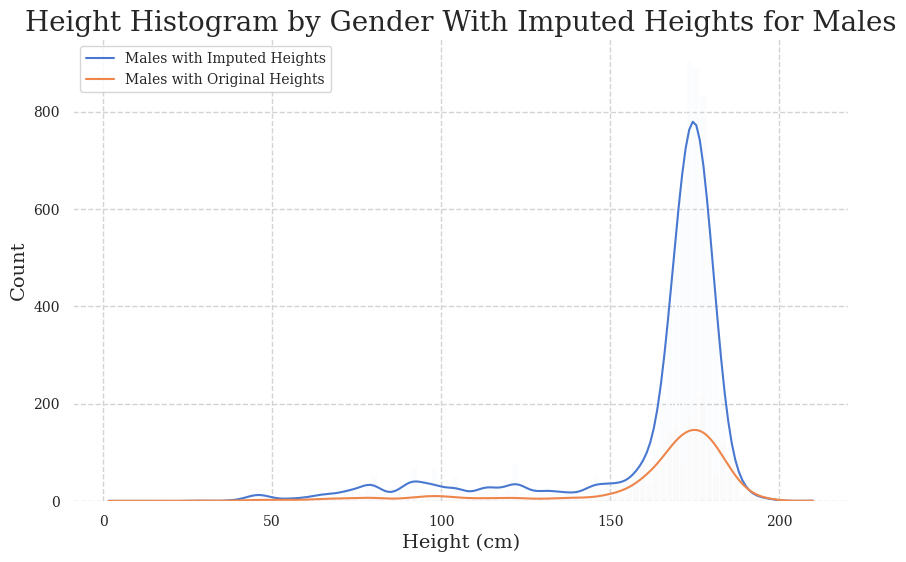

In [28]:
# now histogram of coutns
plt.figure(figsize=(10, 6))
sns.histplot(males["HEIGHT_CM"].dropna(), alpha=0.02, bins=105, kde=True, kde_kws={"bw_adjust":0.6, "cut":0})
sns.histplot(males_train_y.dropna(), alpha=0.01, bins=105, kde=True, kde_kws={"bw_adjust":0.6, "cut":0})
plt.xlabel("Height (cm)")   
plt.ylabel("Count")
plt.title("Height Histogram by Gender With Imputed Heights for Males")
plt.legend(labels=["Males with Imputed Heights", "Males with Original Heights"])
plt.show()

In [29]:
# separate target and features
females_y = females["HEIGHT_CM"]
females_x = females.drop(columns=["HEIGHT_CM"])

# the non nans are the training data
females_train_y = females_y[females_y.notna()] # it is the same as females_before
females_train_x = females_x[females_y.notna()]

# train to get the nans
rf_females = RandomForestRegressor(n_estimators=10, random_state=42)
rf_females.fit(females_train_x, females_train_y)  

# predict the nans
females_pred = rf_females.predict(females_x[females_y.isna()])
females.loc[females_y.isna(), "HEIGHT_CM"] = females_pred

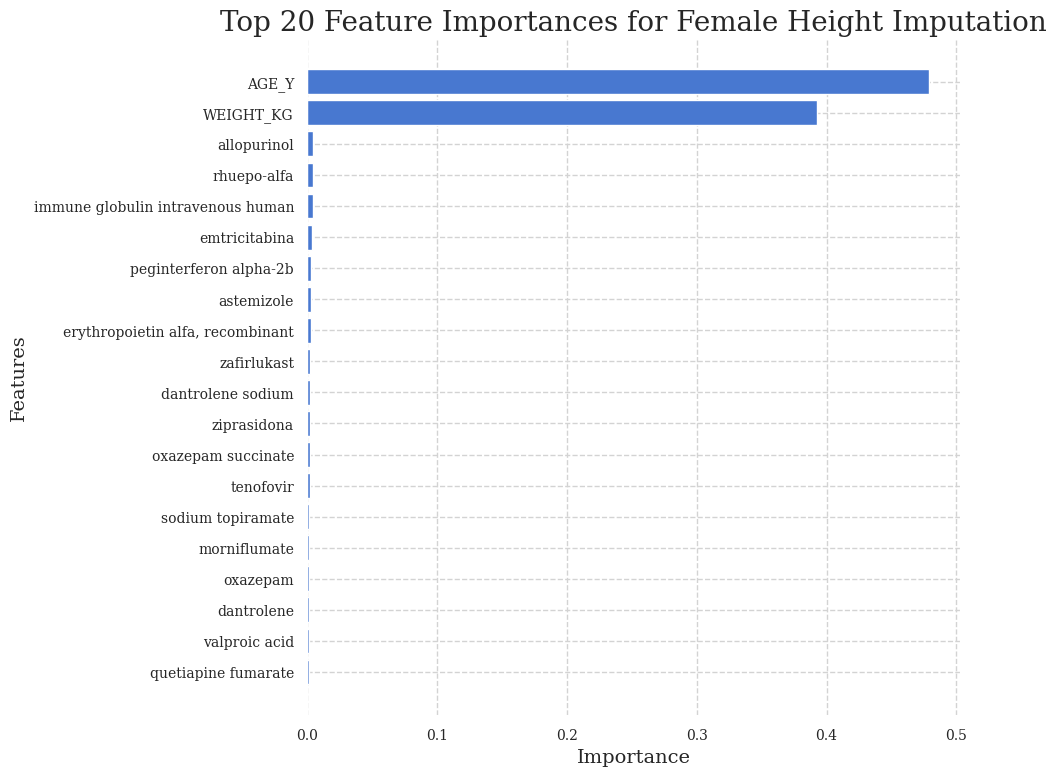

In [30]:
# plot the top 20 most important features as a bar chart
importances = rf_males.feature_importances_
indices = np.argsort(importances)[::-1][:20]  # top 20
features = males_x.columns[indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 8))
plt.barh(features[::-1], top_importances[::-1])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances for Female Height Imputation')
plt.tight_layout()
plt.show()

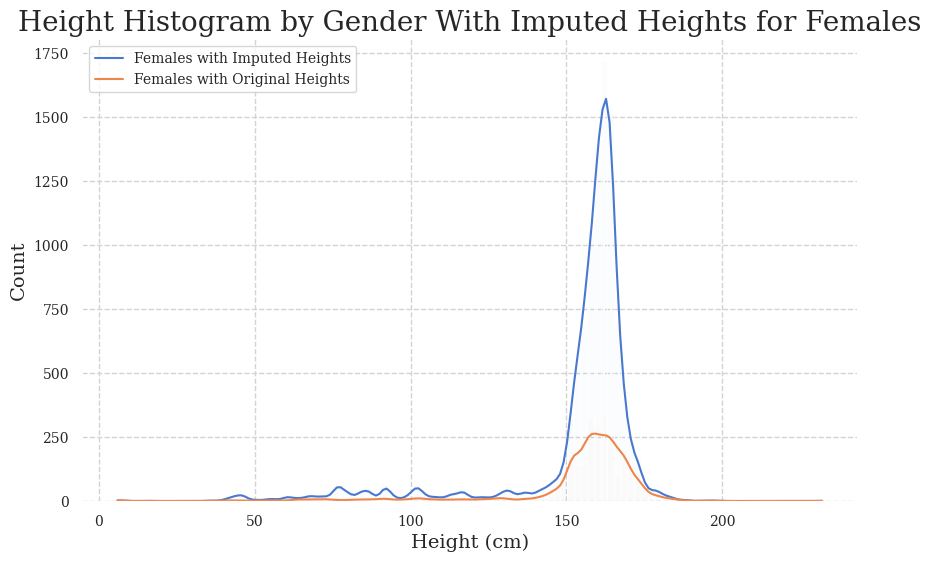

In [31]:
# now histogram of coutns
plt.figure(figsize=(10, 6))
sns.histplot(females["HEIGHT_CM"].dropna(), alpha=0.02, bins=105, kde=True, kde_kws={"bw_adjust":0.4, "cut":0})
sns.histplot(females_train_y.dropna(), alpha=0.01, bins=105, kde=True, kde_kws={"bw_adjust":0.4, "cut":0})
plt.xlabel("Height (cm)")   
plt.ylabel("Count")
plt.title("Height Histogram by Gender With Imputed Heights for Females")
plt.legend(labels=["Females with Imputed Heights", "Females with Original Heights"])
plt.show()

# General Beforo and After Imputation Plots

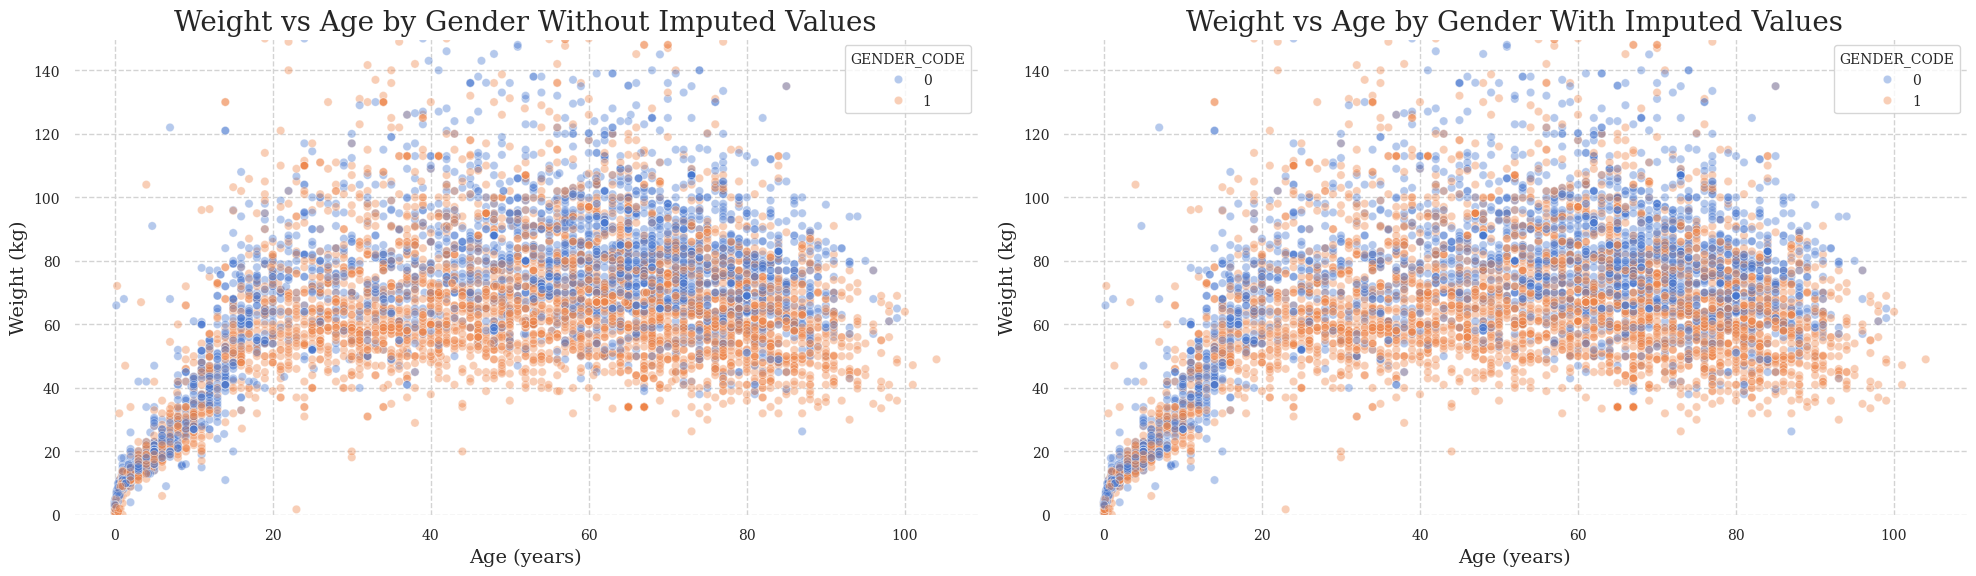

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))


# Second subplot: Without Imputed Values
sns.scatterplot(data=df_copy, x="AGE_Y", y="WEIGHT_KG", hue="GENDER_CODE", alpha=0.4, ax=axes[1])
axes[0].set_xlabel("Age (years)")
axes[0].set_ylabel("Weight (kg)")
axes[0].set_title("Weight vs Age by Gender Without Imputed Values")
axes[0].set_ylim(0, 150)

# First subplot: With Imputed Values
sns.scatterplot(data=df, x="AGE_Y", y="WEIGHT_KG", hue="GENDER_CODE", alpha=0.4, ax=axes[0])
axes[1].set_xlabel("Age (years)")
axes[1].set_ylabel("Weight (kg)")
axes[1].set_title("Weight vs Age by Gender With Imputed Values")
axes[1].set_ylim(0, 150)


plt.tight_layout()
plt.show()

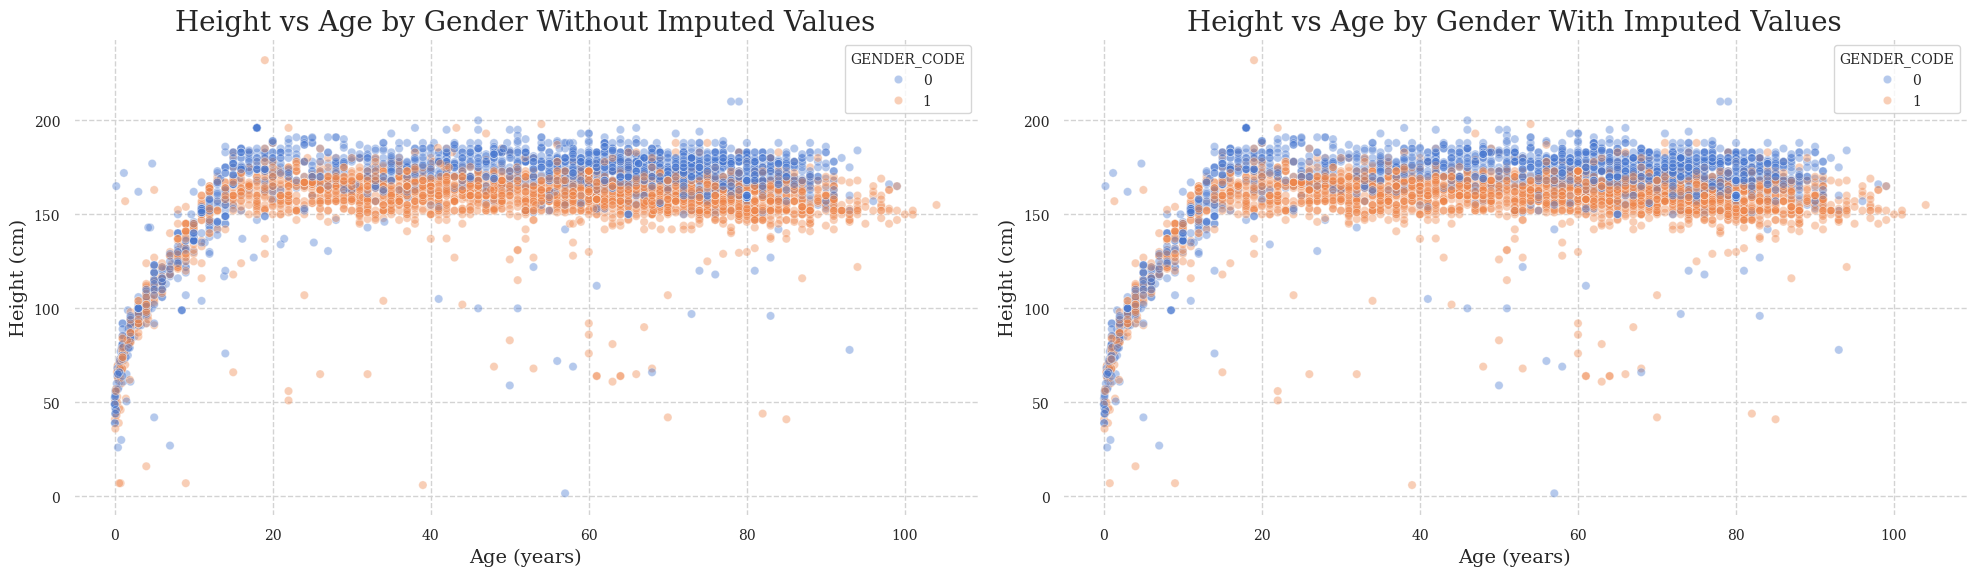

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))


# Second subplot: Without Imputed Values
sns.scatterplot(data=df_copy, x="AGE_Y", y="HEIGHT_CM", hue="GENDER_CODE", alpha=0.4, ax=axes[1])
axes[0].set_xlabel("Age (years)")
axes[0].set_ylabel("Height (cm)")
axes[0].set_title("Height vs Age by Gender Without Imputed Values")

# First subplot: With Imputed Values
sns.scatterplot(data=df, x="AGE_Y", y="HEIGHT_CM", hue="GENDER_CODE", alpha=0.4, ax=axes[0])
axes[1].set_xlabel("Age (years)")
axes[1].set_ylabel("Height (cm)")
axes[1].set_title("Height vs Age by Gender With Imputed Values")


plt.tight_layout()
plt.show()

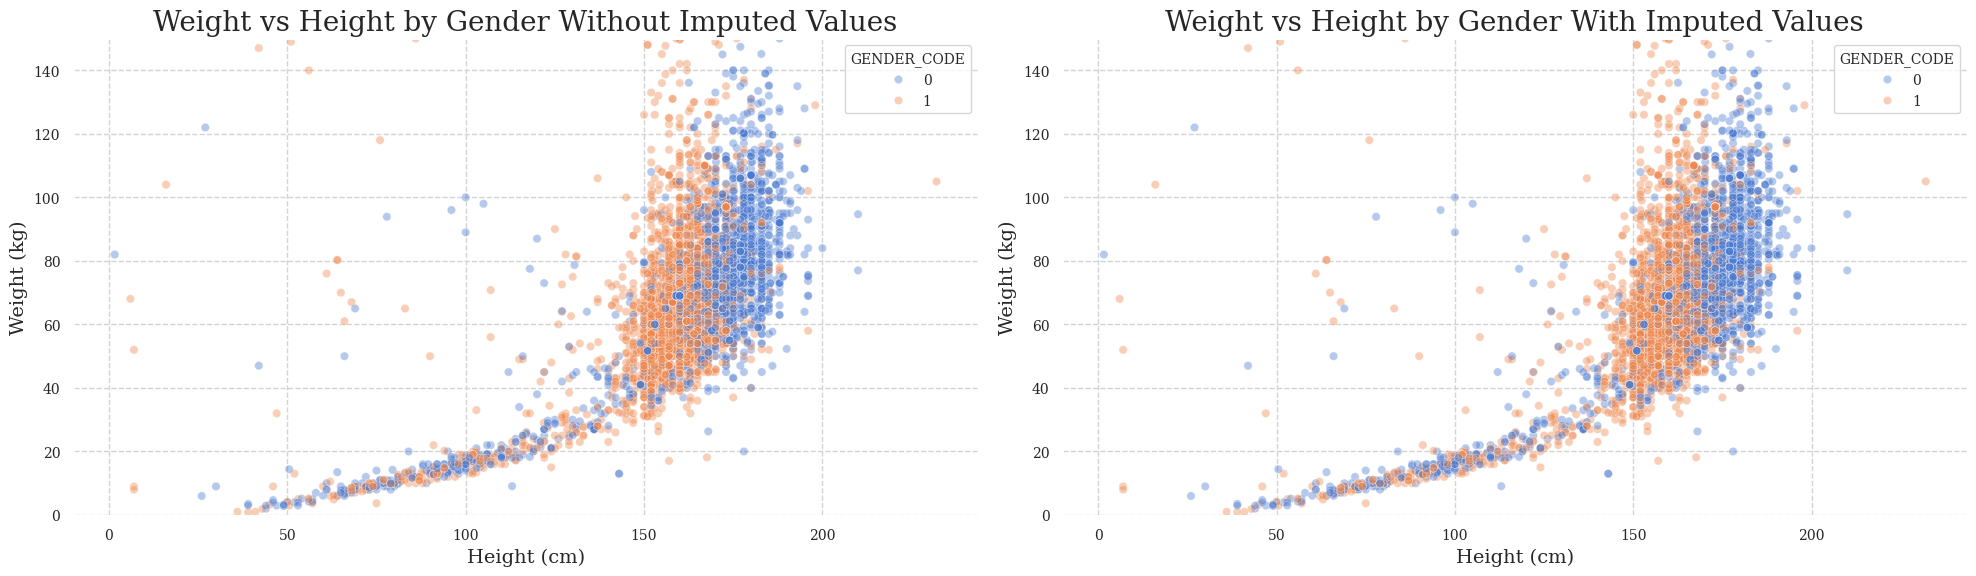

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))


# Second subplot: Without Imputed Values
sns.scatterplot(data=df_copy, x="HEIGHT_CM", y="WEIGHT_KG", hue="GENDER_CODE", alpha=0.4, ax=axes[1])
axes[0].set_xlabel("Height (cm)")
axes[0].set_ylabel("Weight (kg)")
axes[0].set_title("Weight vs Height by Gender Without Imputed Values")
axes[0].set_ylim(0, 150)

# First subplot: With Imputed Values
sns.scatterplot(data=df, x="HEIGHT_CM", y="WEIGHT_KG", hue="GENDER_CODE", alpha=0.4, ax=axes[0])
axes[1].set_xlabel("Height (cm)")
axes[1].set_ylabel("Weight (kg)")
axes[1].set_title("Weight vs Height by Gender With Imputed Values")
axes[1].set_ylim(0, 150)


plt.tight_layout()
plt.show()

# WE ARE DONE WITH THE DATA CLEANING AND IMPUTATION

In [35]:
df.to_parquet(PATH + "pivoted_full_data_imputed.parquet")